# EDA for Fraud detection dataset
Fraud detection dataset is an example dataset from kaggle.com analyzed for educational purposes. 

## Importing and viewing dataset

In [91]:
import pandas as pd
fraud = pd.read_csv('fraud_detection_bank_dataset.csv')
print(fraud.head())
print(fraud.shape)

   Unnamed: 0  col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  \
0           0      9   1354      0     18      0      1      7      9      0   
1           1      0    239      0      1      0      1      0      0      0   
2           2      0    260      0      4      0      3      6      0      0   
3           3     17    682      0      1      0      0      8     17      0   
4           4      1    540      0      2      0      1      7      1      0   

   ...  col_103  col_104  col_105  col_106  col_107  col_108  col_109  \
0  ...        0        0        0        1        1        0        0   
1  ...        0        1        0        0        0        0        0   
2  ...        0        0        0        1        1        0        0   
3  ...        0        1        0        1        1        0        0   
4  ...        0        0        0        1        1        0        0   

   col_110  col_111  targets  
0        0       49        1  
1        0       5

In [92]:
print(fraud.describe())

         Unnamed: 0         col_0         col_1         col_2         col_3  \
count  20468.000000  20468.000000  20468.000000  20468.000000  20468.000000   
mean   10233.500000      3.226256    294.793043      0.420021      2.329343   
std     5908.746991     20.564308    717.541984      7.367275     10.068512   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     5116.750000      0.000000     38.000000      0.000000      0.000000   
50%    10233.500000      0.000000     97.000000      0.000000      1.000000   
75%    15350.250000      2.000000    283.000000      0.000000      2.000000   
max    20467.000000   2301.000000  37808.000000    904.000000    772.000000   

              col_4         col_5         col_6         col_7    col_8  ...  \
count  20468.000000  20468.000000  20468.000000  20468.000000  20468.0  ...   
mean       0.083594      0.939857      2.386066      3.226256      0.0  ...   
std        0.840537      4.222896      3.018140    

Dataset has over 20K records and 114 columns. First column ("Unnamed: 0") is just record ID and is unnecessary for this analysis. Last column is our target value determining whether a transaction was a fraud (1) or not (0). Columns' names are not desriptive so it can be challenging to interpret feature importance and identify redundant features. Nevertheless we can still reduce dimentionality of this dataset. There are few columns that has always the same value (ex. 'col_8'). We can remove those columns because they do not provide any information for predicting target value. 

In [93]:
fraud = fraud.drop('Unnamed: 0', axis=1)
fraud_no_zeros = fraud.loc[:, (fraud != 0).any(axis=0)]
print(fraud_no_zeros.describe())

              col_0         col_1         col_2         col_3         col_4  \
count  20468.000000  20468.000000  20468.000000  20468.000000  20468.000000   
mean       3.226256    294.793043      0.420021      2.329343      0.083594   
std       20.564308    717.541984      7.367275     10.068512      0.840537   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000     38.000000      0.000000      0.000000      0.000000   
50%        0.000000     97.000000      0.000000      1.000000      0.000000   
75%        2.000000    283.000000      0.000000      2.000000      0.000000   
max     2301.000000  37808.000000    904.000000    772.000000     54.000000   

              col_5         col_6         col_7        col_13        col_14  \
count  20468.000000  20468.000000  20468.000000  20468.000000  20468.000000   
mean       0.939857      2.386066      3.226256      0.038646      0.363152   
std        4.222896      3.018140     20.564308    

We reduced number of columns from 114 to 98. 

<Axes: >

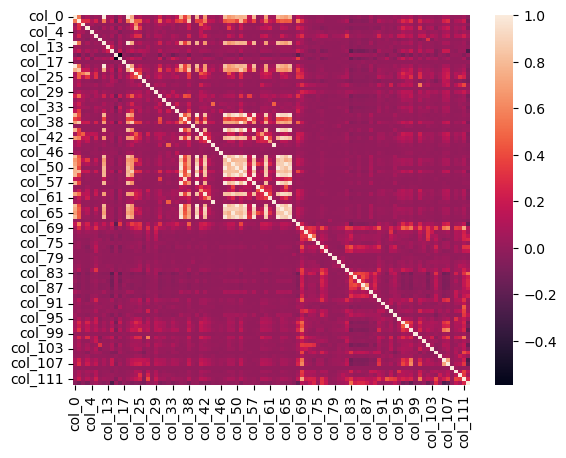

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = fraud_no_zeros.corr()
sns.heatmap(corr)

In [123]:
cols_to_drop = corr[corr['col_0']>0.7].index.values
print("Column highly correlated: ")
print(cols_to_drop)

col_most_corr_to_target = corr.loc['targets',cols_to_drop].sort_values().index[0]
print("Column most correlated to target column from list of highly correlated columns: " + col_most_corr_to_target)
cols_to_drop = np.delete(cols_to_drop, np.where(cols_to_drop == col_most_corr_to_target))
fraud_reduced = fraud_no_zeros.drop(cols_to_drop ,axis=1)
print(fraud_reduced.shape)

Column highly correlated: 
['col_0' 'col_7' 'col_22' 'col_23' 'col_36' 'col_40' 'col_47' 'col_49'
 'col_50' 'col_54' 'col_55' 'col_57' 'col_63' 'col_64' 'col_66']
Column most correlated to target column from list of highly correlated columns: col_23
(20468, 84)


<Axes: >

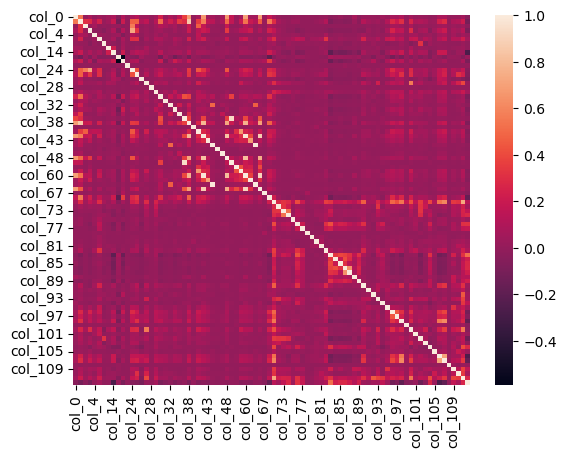

In [87]:
corr2 = fraud_reduced.corr()
sns.heatmap(corr2)

Checking for high correlation between features and target values
If we have in our dataset features highly correlated to target values then we can expect that our predictions will be very accurate and mostly based on this feature. It can also mean that creating a prediction model is unnecesary and one 'if' condition can solve our classification problem.

In [70]:
cols_with_high_corr_to_target = corr2[corr2['targets']>0.6].index.values
print(cols_with_high_corr_to_target)

['targets']


In [125]:
print(fraud_reduced.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 84 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   col_1    20468 non-null  int64  
 1   col_2    20468 non-null  int64  
 2   col_3    20468 non-null  int64  
 3   col_4    20468 non-null  int64  
 4   col_5    20468 non-null  int64  
 5   col_6    20468 non-null  int64  
 6   col_13   20468 non-null  int64  
 7   col_14   20468 non-null  int64  
 8   col_15   20468 non-null  int64  
 9   col_16   20468 non-null  int64  
 10  col_17   20468 non-null  int64  
 11  col_23   20468 non-null  int64  
 12  col_24   20468 non-null  int64  
 13  col_25   20468 non-null  int64  
 14  col_26   20468 non-null  int64  
 15  col_27   20468 non-null  int64  
 16  col_28   20468 non-null  int64  
 17  col_29   20468 non-null  int64  
 18  col_30   20468 non-null  int64  
 19  col_31   20468 non-null  int64  
 20  col_32   20468 non-null  int64  
 21  col_33   204

In [126]:
fraud_reduced['targets'].value_counts()

targets
0    15030
1     5438
Name: count, dtype: int64

In [137]:
categorical = pd.DataFrame()
numerical = pd.DataFrame()
for col in fraud_reduced.columns:
    if fraud_reduced[col].min() == 0 and fraud_reduced[col].max() == 1:
        categorical[col] = fraud_reduced[col]
    else: 
        numerical[col] = fraud_reduced[col]
        
print(categorical.shape)
print(numerical.shape)

(20468, 42)
(20468, 42)


In [139]:
# Setting jupyter display settings, so that it doesn't hide any columns
pd.set_option('display.max_columns', None) 
print(numerical.describe())

              col_1         col_2         col_3         col_4         col_5  \
count  20468.000000  20468.000000  20468.000000  20468.000000  20468.000000   
mean     294.793043      0.420021      2.329343      0.083594      0.939857   
std      717.541984      7.367275     10.068512      0.840537      4.222896   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       38.000000      0.000000      0.000000      0.000000      0.000000   
50%       97.000000      0.000000      1.000000      0.000000      0.000000   
75%      283.000000      0.000000      2.000000      0.000000      1.000000   
max    37808.000000    904.000000    772.000000     54.000000    230.000000   

              col_6         col_17        col_23        col_24        col_25  \
count  20468.000000   20468.000000  20468.000000  20468.000000  20468.000000   
mean       2.386066     196.679500     34.201290      3.068790      2.701925   
std        3.018140    6700.095223    126.109375

In [144]:
#sns.pairplot(numerical)
most_zeros = pd.DataFrame()
not_zeros = pd.DataFrame()
for col in numerical.columns:
    if np.percentile(numerical[col], 75)==0:
        most_zeros[col] = numerical[col]
    else:
        not_zeros[col] = numerical[col]
print(most_zeros.shape)
print(not_zeros.shape)

(20468, 27)
(20468, 15)


C:\Users\Agata\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


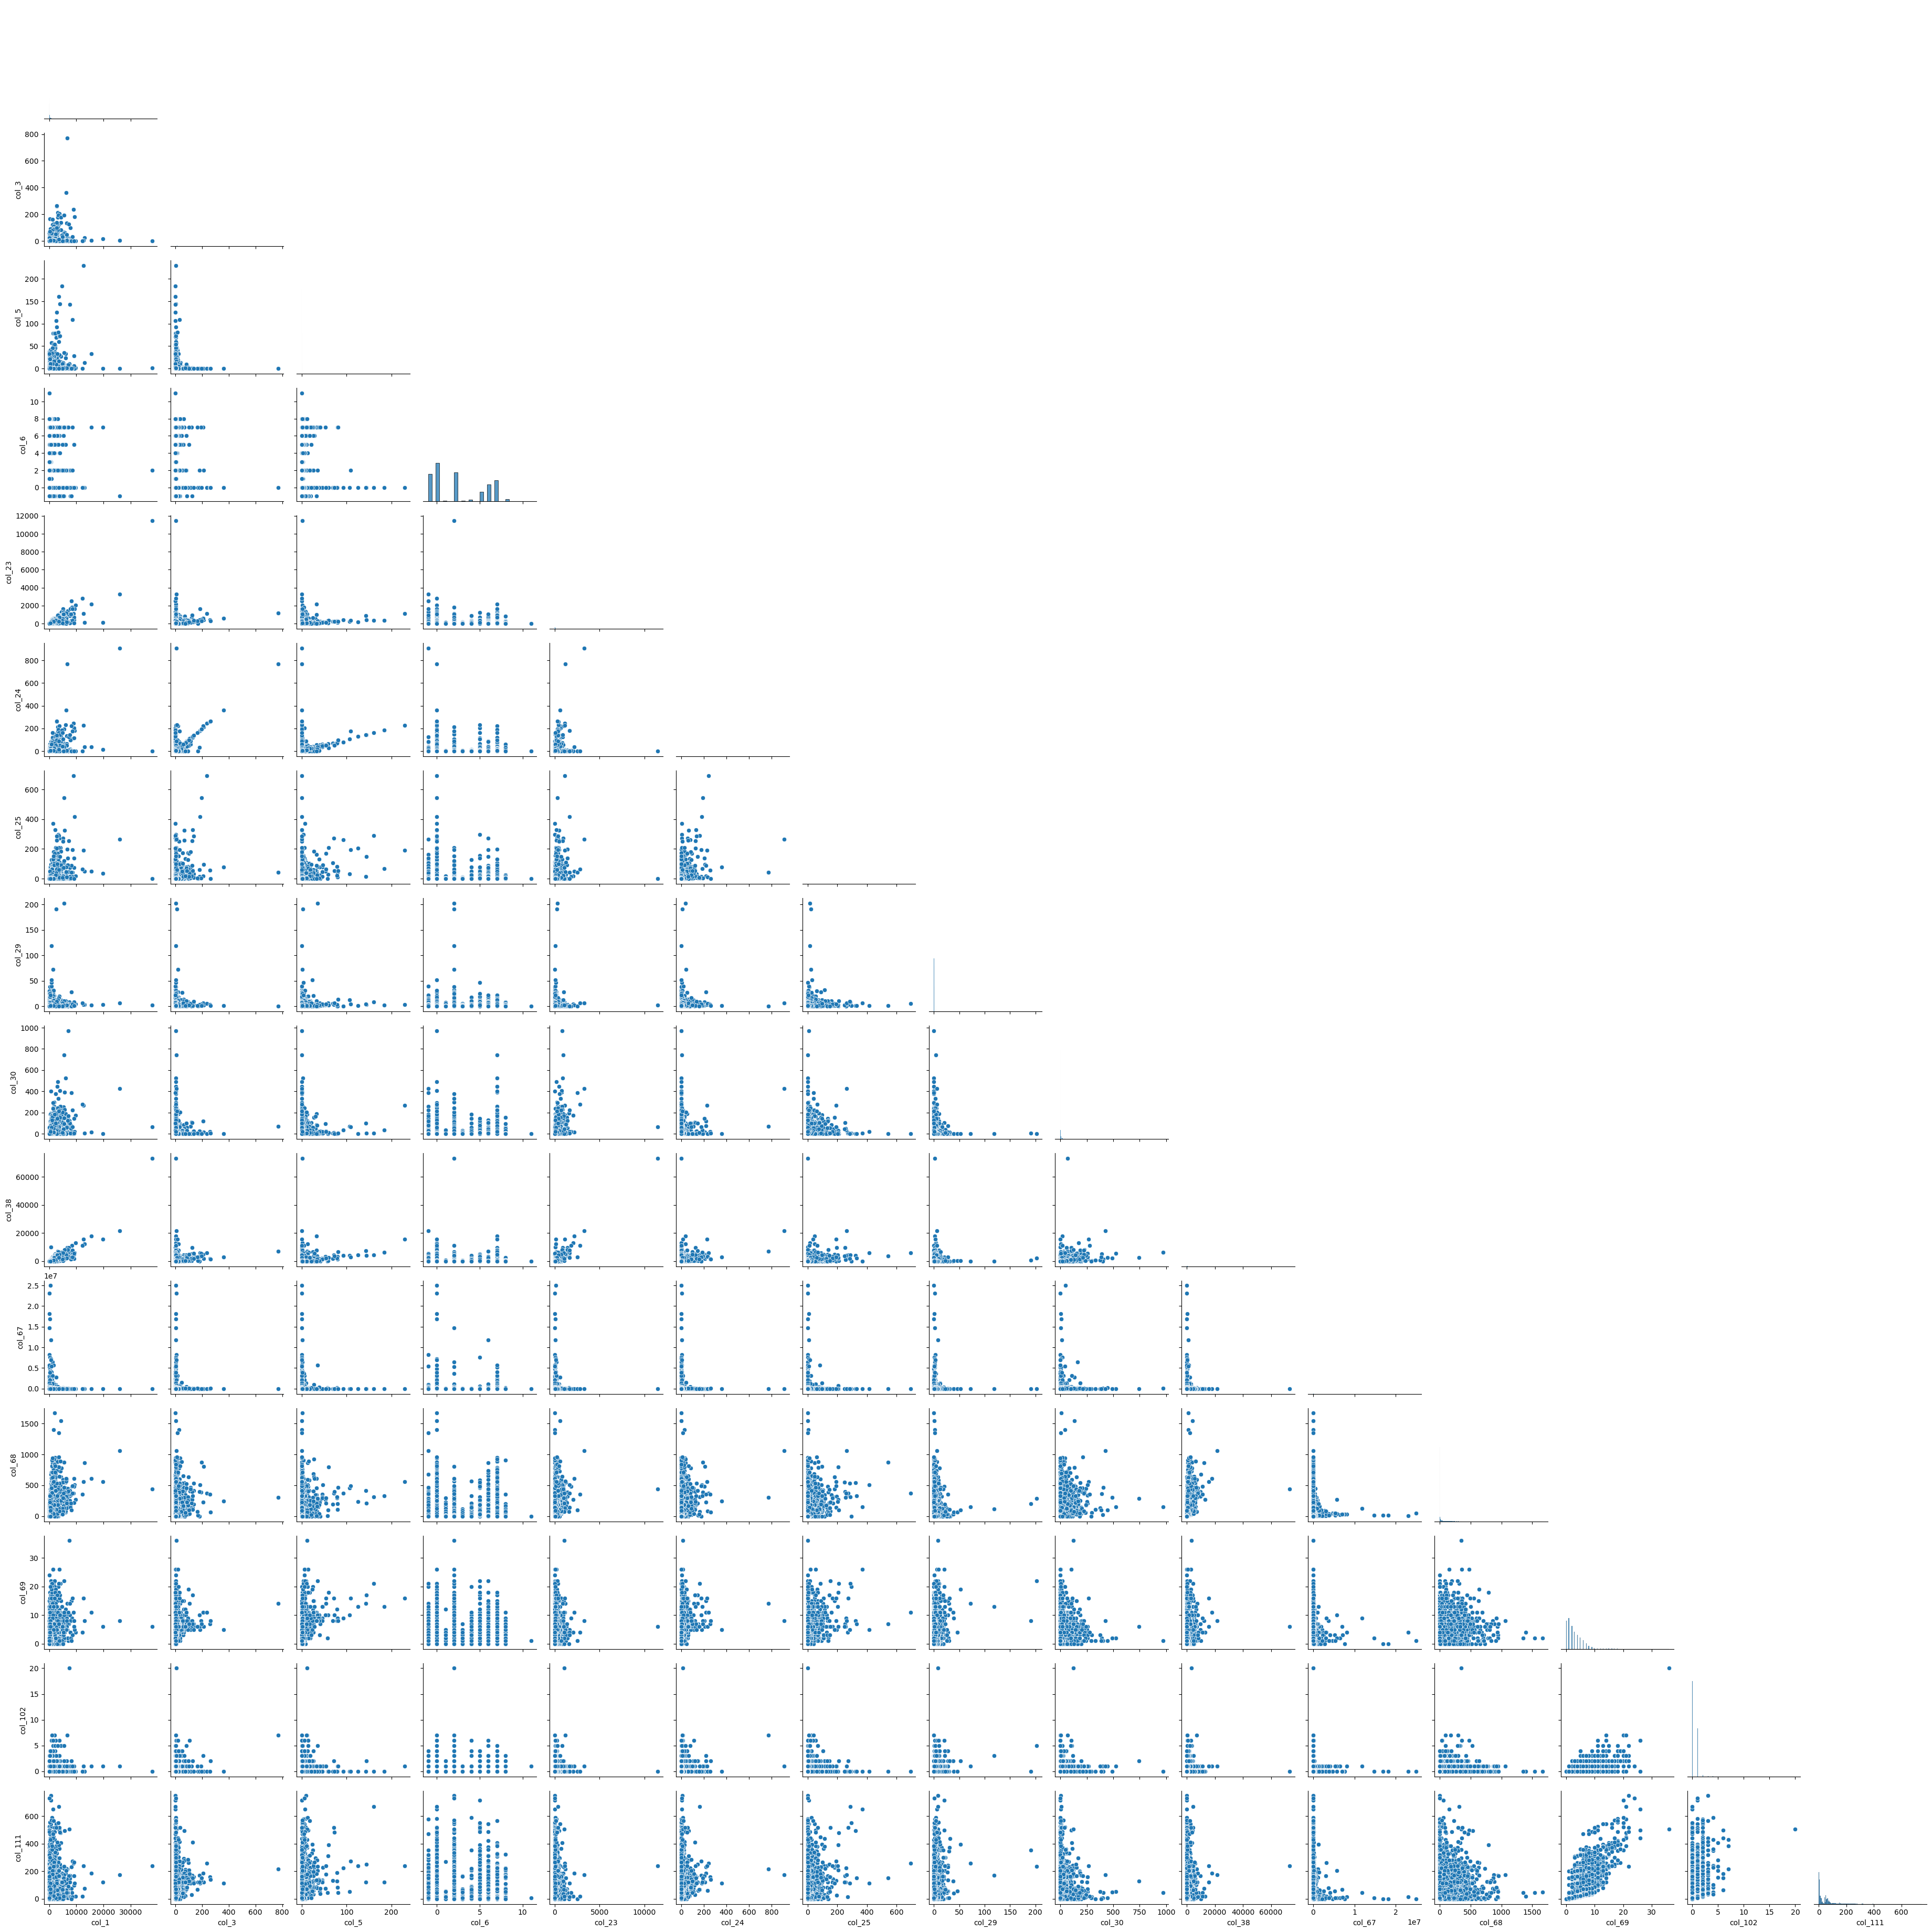

In [145]:
#sns.pairplot(not_zeros, corner = True) # WARNING - Calculates for few minutes
#plt.show()

# Outliers
We can see that in this dataset there are plenty outliers. Good practice would be to give them a closer look. Since there is not enough information about features, outliers will not be removed. They can contain some cruitial information and since it is not one or two values, but plenty, we can assume that it is correct feature distribution. 